## Mosaics of Star Trek

# Extract the path, Get the URL, and Resize Images 

Star Trek Guest Stars Movies pictures extracted, resized and used to create 3 mosaics. 

In [67]:
# Import needy files

import json
import star_trek_tos_data as TOS
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import requests as req
import urllib.request
from PIL import Image
import photomosaic as pm
import scipy.misc

In [68]:
# Loop through pic paths and save them in appropirate lists 

back_pic = []
poster_pic = []
cast_pic = []

for movie_id in TOS.guest_movies:
    movie_dat = TOS.guest_movies[movie_id]
    
    # print(json.dumps(movie_dat['credits']['cast'][0]['profile_path'], indent = 4, sort_keys = True))
    
    try:
        back_pic.append(movie_dat['backdrop_path'])
        poster_pic.append(movie_dat['poster_path'])
        cast_pic.append(movie_dat['credits']['cast'][0]['profile_path'])
        
    
    except KeyError:
        print('Error')

Error


In [69]:
# Get rid of NaNs

back_pic_clean = [x for x in back_pic if x is not None]
poster_pic_clean = [x for x in poster_pic if x is not None]
cast_pic_clean = [x for x in cast_pic if x is not None]

In [70]:
len(back_pic_clean)

2715

In [71]:
len(poster_pic_clean)

3828

In [72]:
len(cast_pic_clean)

3746

In [73]:
# Get the bac pictures url from TMDB API

base_url = 'https://image.tmdb.org/t/p/w500/'


back_data = []

for pic in back_pic_clean:
    url = base_url + pic
    back_data.append(url)

In [74]:
# Resize pictures of background pictures

'''
for index, url in enumerate(back_data):
    
    try:
        resource = urllib.request.urlopen(url)
        im = Image.open(resource)
        im.thumbnail([30,30])
        im.save(f"./pictures/pic{index}.jpg")
        # print(im)
    except KeyError: 
        print('pass')

'''

'\nfor index, url in enumerate(back_data):\n    \n    try:\n        resource = urllib.request.urlopen(url)\n        im = Image.open(resource)\n        im.thumbnail([30,30])\n        im.save(f"./pictures/pic{index}.jpg")\n        # print(im)\n    except KeyError: \n        print(\'pass\')\n\n'

In [75]:
# Get the poster pictures url from TMDB API

poster_data = []
for pic in poster_pic_clean:
    url = base_url + pic
    poster_data.append(url)

In [76]:
# Resize pictures of poster pictures

'''
for index, url in enumerate(poster_data):
    
    try:
        resource = urllib.request.urlopen(url)
        im = Image.open(resource)
        im.thumbnail([30,30])
        im.save(f"./pictures_poster/pic{index}.jpg")
        # print(im)
    except KeyError: 
        print('pass')
'''

'\nfor index, url in enumerate(poster_data):\n    \n    try:\n        resource = urllib.request.urlopen(url)\n        im = Image.open(resource)\n        im.thumbnail([30,30])\n        im.save(f"./pictures_poster/pic{index}.jpg")\n        # print(im)\n    except KeyError: \n        print(\'pass\')\n'

In [77]:
# Get the cast pictures url from TMDB API 

cast_data = []
for pic in cast_pic_clean:
    url = base_url + pic
    cast_data.append(url)

In [78]:
# Resize pictures of cast pictures 

'''
for index, url in enumerate(cast_data):
    
    try:
        resource = urllib.request.urlopen(url)
        im = Image.open(resource)
        im.thumbnail([30,30])
        im.save(f"./pictures_cast/pic{index}.jpg")
        # print(im)
    except KeyError: 
        print('pass')

'''

'\nfor index, url in enumerate(cast_data):\n    \n    try:\n        resource = urllib.request.urlopen(url)\n        im = Image.open(resource)\n        im.thumbnail([30,30])\n        im.save(f"./pictures_cast/pic{index}.jpg")\n        # print(im)\n    except KeyError: \n        print(\'pass\')\n\n'

## Making the Mosaics

In [79]:
# Create a pool of pictures from poster pictures

pool_poster = pm.make_pool('./pictures_poster/*.jpg')
pool_back = pm.make_pool('./pictures_back/*.jpg')
pool_cast = pm.make_pool('./pictures_cast/*.jpg')

analyzing pool: 100%|██████████| 3746/3746 [00:53<00:00, 69.72it/s]


In [90]:
# Open the image that will have the mosaics

img_poster = Image.open('star_trek_pic_1.jpg')
img_back = Image.open('star_trek_pic_2.jpg')
img_cast = Image.open('star_trek_pic_3.jpg')

In [91]:
mos_poster = pm.basic_mosaic(img_poster, pool, (150,150))
mos_back = pm.basic_mosaic(img_back, pool, (150,150))
mos_cast = pm.basic_mosaic(img_cast, pool, (150,150))

C:\Users\mrbal\Anaconda3\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
drawing mosaic: 100%|██████████| 22500/22500 [00:05<00:00, 3825.92it/s]


In [92]:
# Save the mosaics

scipy.misc.imsave('mosaic_poster.png', mos_poster)
scipy.misc.imsave('mosaic_back.png', mos_back)
scipy.misc.imsave('mosaic_cast.png', mos_cast)

In [95]:
img1 = Image.open('mosaic_poster.png')
img2 = Image.open('mosaic_back.png')
img3 = Image.open('mosaic_cast.png')

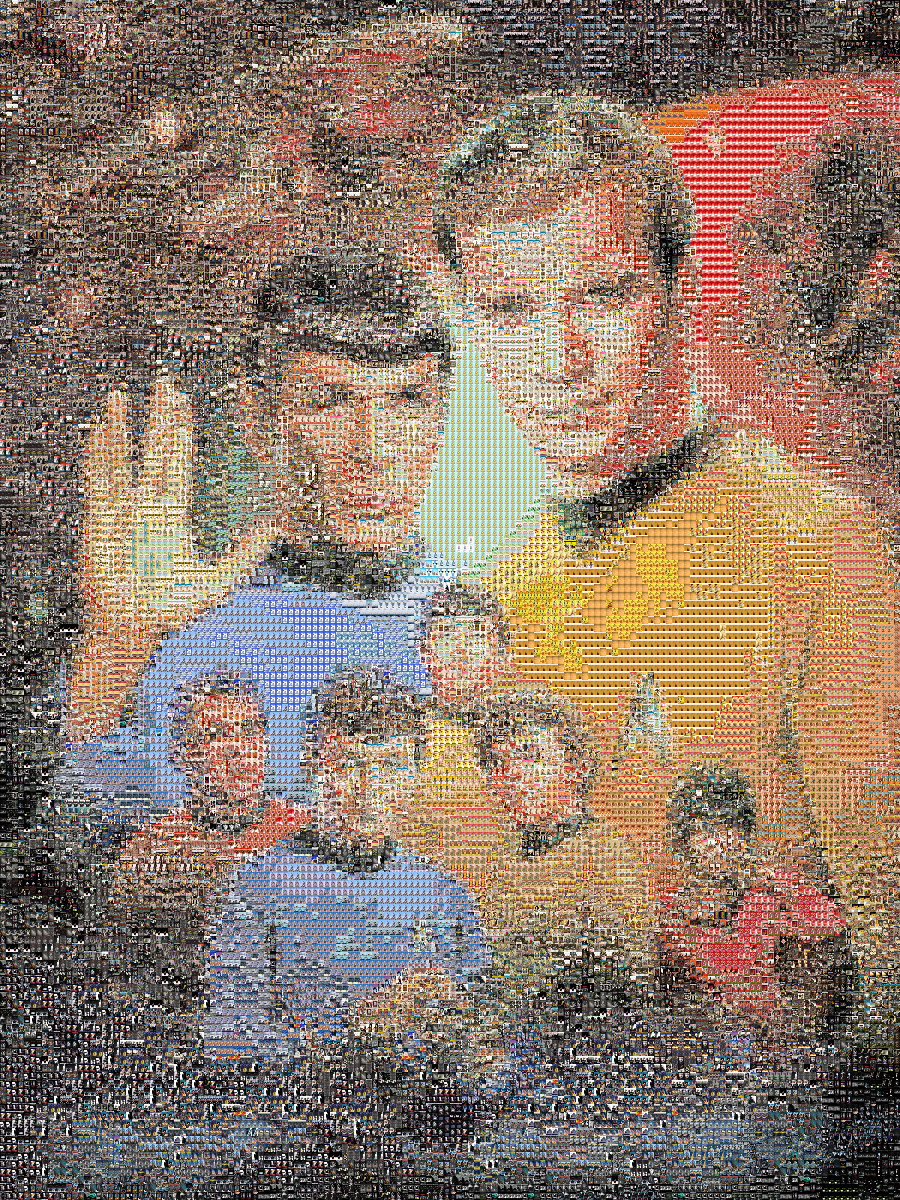

In [100]:
img1

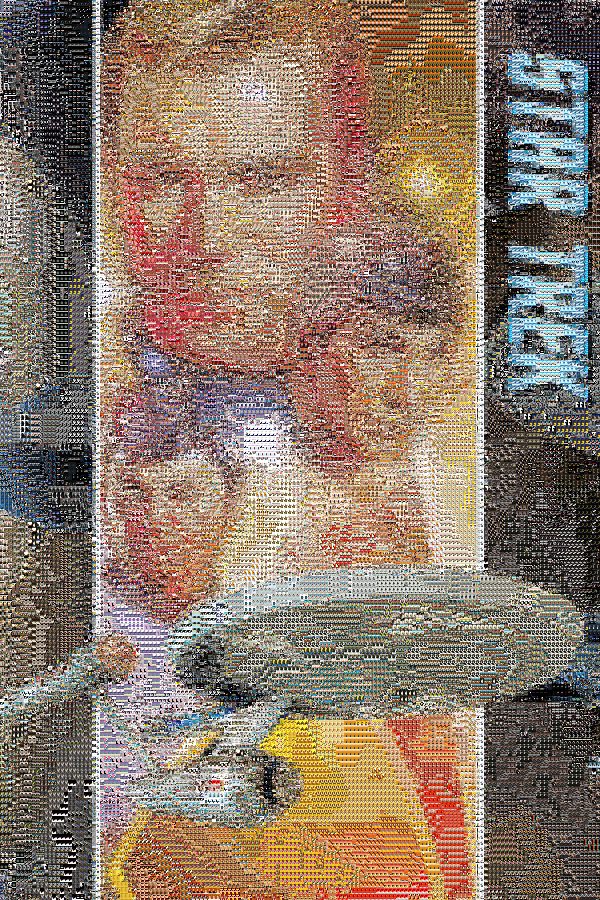

In [108]:
img2

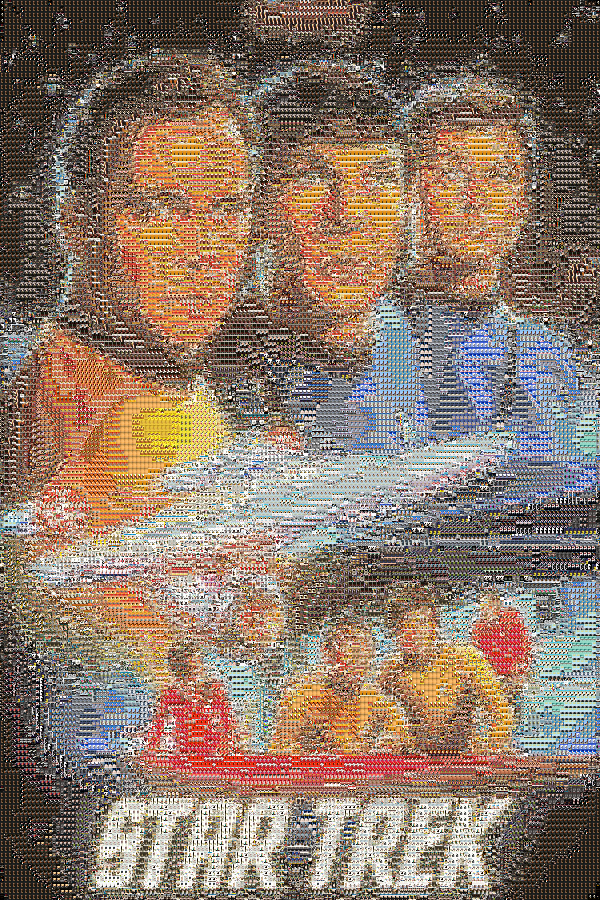

In [109]:
img3